<p>4. Utiliza un modelo pre entrenado para determinar el sentimiento de los tweets.
<p>Preguntas:
<p>a. ¿Cuáles son las predicciones? Interpreta los resultados.
<p>b. ¿Qué variables son las más importantes del modelo?
<p>c. ¿Cómo podrías mejorar el modelo?
<p>d. ¿Qué otras oportunidades se te ocurren donde se podrían aplicar otros
modelos de ML?

In [1]:
import pickle 
import pandas as pd
pd.set_option('display.max_colwidth', None)

import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import collections

----
----
----
LEYENDO SQL a DF

In [2]:
DB='../data/DB_twitter.db'

sql = sqlite3.connect(DB)

query= '''Select t.*, u.name, u.username FROM tweets t JOIN users u ON t.user_id = u.user_id'''
# query= '''Select t.* FROM tweets t'''

df_tweets = pd.read_sql(query,sql,index_col=['id'])

sql.close()

In [3]:
df_tweets.shape

(166, 10)

----
---
---
Tratamiento del texto

In [4]:
df_tweets.head(1)

,tweet,language,date,time,retweets_count,replies_count,likes_count,user_id,name,username
id,,,,,,,,,,
1577654769098842112,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI,es,2022-10-05,15:39:43,2,0,3,1162694149956603904,The Bridge,thebridge_tech


In [5]:
df_text_tweet = pd.DataFrame(df_tweets['tweet'])
df_text_tweet.head()

,tweet
id,
1577654769098842112,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI
1577564440530124802,¡Feliz Día a nuestros Lead Instructors y Teacher Assistants! 🎉 Sabemos que en ocasiones un #bootcamp es duro para tod@s pero cada día dais el 💯% ¡Gracias por hacer lo #digital mucho más fácil! #diamundialdelosdocentes #data #ciber #desarrollowebfullstack #mkt #uxui #cloud https://t.co/Qnehy8ODCq
1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀"
1576951801047179264,"¡Vuelven las #becas Digital Talent Pipeline! 1⃣0⃣0⃣ becas para formarte en la próxima edición de nuestros #bootcamp en Madrid, Valencia y Sevilla. ¡Solicita ya tu beca!🏃‍♀️ https://t.co/V5kikwpJrD #dtp #becasformacion #digitaltalent https://t.co/q7RVbD2iLU"
1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻 Toda la información aquí! 👇 https://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX


In [6]:
# Quitar signos de puntuación
import re

signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\¡)|(\?)|(\¿)|(\@)|(\,)|(\")|(\#)|(\()|(\))|(\[)|(\])|(\d+)")

def signs_tweets(tweet):
    return signos.sub('', tweet.lower())

df_text_tweet['tweet'] = df_text_tweet['tweet'].apply(signs_tweets)
df_text_tweet.head(1)

,tweet
id,
1577654769098842112,ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- con el programa de genyusschool descubren su yo emprendedor mientras se divierten👏 aún estás a tiempo👉 https//tco/uaemcojgy https//tco/gibjeuci


In [7]:
# Quitar links
def remove_links(df):
    # return " ".join(['{link}' if ('http') in word else word for word in df.split()])
    return " ".join(['' if ('http') in word else word for word in df.split()])

df_text_tweet['tweet'] = df_text_tweet['tweet'].apply(remove_links)
df_text_tweet.head(1)

,tweet
id,
1577654769098842112,ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- con el programa de genyusschool descubren su yo emprendedor mientras se divierten👏 aún estás a tiempo👉


In [8]:
# Aplicamos Stopwords
from nltk.corpus import stopwords 

spanish_stopwords = stopwords.words('spanish')

def remove_stopwords(df):
    return " ".join([word for word in df.split() if word not in spanish_stopwords])

df_text_tweet['tweet'] = df_text_tweet['tweet'].apply(remove_stopwords)
df_text_tweet.head(1)

,tweet
id,
1577654769098842112,aquí primeros mini emprendedores 🤩 pasándoselo grande mientras empiezan proceso ideación proyectos- programa genyusschool descubren emprendedor mientras divierten👏 aún tiempo👉


In [9]:
# Aplicamos SnowballStemmer
from nltk.stem.snowball import SnowballStemmer

def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

df_text_tweet['tweet'] = df_text_tweet['tweet'].apply(spanish_stemmer)
df_text_tweet.head(1)

,tweet
id,
1577654769098842112,aqu primer mini emprendedor 🤩 pas grand mientr empiez proces ideacion proyectos- program genyusschool descubr emprendedor mientr divierten👏 aun tiempo👉


In [10]:
# Quitar emojis
df_text_tweet=df_text_tweet.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df_text_tweet.head(1)

,tweet
id,
1577654769098842112,aqu primer mini emprendedor pas grand mientr empiez proces ideacion proyectos- program genyusschool descubr emprendedor mientr divierten aun tiempo


In [11]:
df_text_tweet

,tweet
id,
1577654769098842112,aqu primer mini emprendedor pas grand mientr empiez proces ideacion proyectos- program genyusschool descubr emprendedor mientr divierten aun tiempo
1577564440530124802,feliz dia lead instructors teach assistants sab ocasion bootcamp dur tods cad dia dais % graci hac digital facil diamundialdelosdocent dat cib desarrollowebfullstack mkt uxui cloud
1577334577701453827,recordar seman vien primer qued cps madr thebridge_tech gran suert cont recuenc de charl plaz agot pod apunt grup proxim qued
1576951801047179264,vuelv bec digital talent pipelin bec formart proxim edicion bootcamp madr valenci sevill solicit beca dtp becasformacion digitaltalent
1576902991507922944,desarroll web perfil demand merc laboral descubr bootcamp desarroll web full stack man thebridge_tech tod inform aqu
...,...
1536311923423203331,thebridge_tech heavymental_ alient buen form empez seman
1536310998319210496,thebridge_tech heavymental_ alient
1536310702876549123,promet lleg graci thebridge_tech ultim entrad podcast direct d cc atorrerus muld joansabat pesetjair pelayoarbu adriskou estodoporn


----
---
---
Modelo

In [12]:
# Cargar modelo
with open('../model/sentiment_model', "rb") as archivo_entrada:
    model = pickle.load(archivo_entrada) 

model

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [13]:
df_text_tweet

,tweet
id,
1577654769098842112,aqu primer mini emprendedor pas grand mientr empiez proces ideacion proyectos- program genyusschool descubr emprendedor mientr divierten aun tiempo
1577564440530124802,feliz dia lead instructors teach assistants sab ocasion bootcamp dur tods cad dia dais % graci hac digital facil diamundialdelosdocent dat cib desarrollowebfullstack mkt uxui cloud
1577334577701453827,recordar seman vien primer qued cps madr thebridge_tech gran suert cont recuenc de charl plaz agot pod apunt grup proxim qued
1576951801047179264,vuelv bec digital talent pipelin bec formart proxim edicion bootcamp madr valenci sevill solicit beca dtp becasformacion digitaltalent
1576902991507922944,desarroll web perfil demand merc laboral descubr bootcamp desarroll web full stack man thebridge_tech tod inform aqu
...,...
1536311923423203331,thebridge_tech heavymental_ alient buen form empez seman
1536310998319210496,thebridge_tech heavymental_ alient
1536310702876549123,promet lleg graci thebridge_tech ultim entrad podcast direct d cc atorrerus muld joansabat pesetjair pelayoarbu adriskou estodoporn


----
----
----
a. ¿Cuáles son las predicciones? Interpreta los resultados.

In [14]:
prediction = model.predict(df_text_tweet['tweet'])

In [15]:
prediction

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
# El modelo clasifica los tweets en dos categorías
# 0 = Bueno
# 1 = No bueno (puede ser tanto malo como neutro)

In [16]:
# Contamos cuantos tweets positivos y negativos/neutros tenemos
unique, counts = np.unique(prediction, return_counts=True)

print(dict(zip(unique, counts)));  

{0: 119, 1: 47}


In [17]:
predictions = df_tweets[['tweet']].copy()
predictions['Prediccion'] = prediction

# Guardar predicción
# predictions.to_csv('data/prediction.csv', index=False)

predictions.head()

,tweet,Prediccion
id,,
1577654769098842112,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI,1
1577564440530124802,¡Feliz Día a nuestros Lead Instructors y Teacher Assistants! 🎉 Sabemos que en ocasiones un #bootcamp es duro para tod@s pero cada día dais el 💯% ¡Gracias por hacer lo #digital mucho más fácil! #diamundialdelosdocentes #data #ciber #desarrollowebfullstack #mkt #uxui #cloud https://t.co/Qnehy8ODCq,0
1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀",0
1576951801047179264,"¡Vuelven las #becas Digital Talent Pipeline! 1⃣0⃣0⃣ becas para formarte en la próxima edición de nuestros #bootcamp en Madrid, Valencia y Sevilla. ¡Solicita ya tu beca!🏃‍♀️ https://t.co/V5kikwpJrD #dtp #becasformacion #digitaltalent https://t.co/q7RVbD2iLU",1
1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻 Toda la información aquí! 👇 https://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX,0


In [18]:
predictions.head(30)

,tweet,Prediccion
id,,
1577654769098842112,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI,1
1577564440530124802,¡Feliz Día a nuestros Lead Instructors y Teacher Assistants! 🎉 Sabemos que en ocasiones un #bootcamp es duro para tod@s pero cada día dais el 💯% ¡Gracias por hacer lo #digital mucho más fácil! #diamundialdelosdocentes #data #ciber #desarrollowebfullstack #mkt #uxui #cloud https://t.co/Qnehy8ODCq,0
1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀",0
1576951801047179264,"¡Vuelven las #becas Digital Talent Pipeline! 1⃣0⃣0⃣ becas para formarte en la próxima edición de nuestros #bootcamp en Madrid, Valencia y Sevilla. ¡Solicita ya tu beca!🏃‍♀️ https://t.co/V5kikwpJrD #dtp #becasformacion #digitaltalent https://t.co/q7RVbD2iLU",1
1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻 Toda la información aquí! 👇 https://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX,0
1576856703349374976,@jorgegrev @TheBridge_Tech Enhorabuena crack!,0
1575217357105946624,Hoy por fin ve la luz mi primer Case Study público. Un trabajo intensivo de fin de bootcamp realizado con un cliente real @emancipaTIC y dos semanas para que las 5 verticales en @TheBridge_Tech hiciésemos realidad un MVP. Os invito a verlo y dar feedback. https://t.co/rkCjxulYS9 https://t.co/PqM0dvxj3X,0
1575074337761132545,¡Nuevo acuerdo de colaboración con @michaelpage_es! 🤝 👩‍💻Alianza clave en nuestro objetivo de reducir la brecha de competencias digitales y dotar de profesionales técnicos a las empresas. #brechadigital #empleabilidad #digitaltalent https://t.co/tEFiLxMjnA,0
1574849353172373504,"¿Eres o quieres ser talento IT y estás en España? 🇪🇸 Si la respuesta es sí, te contamos que tenemos alianzas con @IDBootcamps y @TheBridge_Tech💻 Estamos felices abrir nuestras puertas para que estudiantes de nuestros partners se conviertan en futuros Yellowers 🥳",0


---
---
---
b. ¿Qué variables son las más importantes del modelo?

In [20]:
model

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [21]:
# Nombre de las variables
model[: -1].get_feature_names_out()

array(['_rubalcaba_', 'abandon', 'abc', 'abc_es', 'abces', 'abiert',
       'abog', 'abraz', 'abre', 'abril', 'absolut', 'acab', 'accident',
       'acept', 'acerc', 'acert', 'aclar', 'acompañ', 'acord', 'activ',
       'acto', 'actual', 'acuerd', 'acus', 'adel', 'ademas', 'administr',
       'admir', 'aeropuert', 'afect', 'agu', 'aguirr', 'ahi', 'ahor',
       'ahor si', 'air', 'ajust', 'albert_river', 'alcald', 'alegr',
       'alejandrosanz', 'alemani', 'alexdelaiglesi', 'alfons', 'algui',
       'algun', 'alli', 'alons', 'amaiur', 'amenaz', 'amig', 'amnist',
       'amor', 'ampli', 'ana', 'analisis', 'andaluc', 'andaluci',
       'andaluz', 'anim', 'anoch', 'anotici', 'anterior', 'anunci',
       'aplaud', 'aplaus', 'aplic', 'apoy', 'aprob', 'apuest', 'aqu',
       'aquell', 'aqui', 'aren', 'argentin', 'arranc', 'arte', 'articul',
       'asegur', 'asi', 'asturi', 'asunt', 'ataqu', 'atencion',
       'athletic', 'audienci', 'aument', 'aun', 'aunqu', 'auster',
       'autonom', 'ave

In [22]:
model.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])>

In [23]:
# Coeficientes de las variables
model[1].coef_.flatten()

array([-1.61173785e-01,  5.82203991e-01,  4.98376702e-01, -6.15336877e-02,
        1.95989011e-01, -4.69166313e-01,  4.57428613e-01, -6.43551319e-01,
       -9.27232445e-01, -3.46981965e-01, -3.28751733e-01, -4.75327048e-02,
        9.01718129e-01,  1.80381663e-01, -6.56063195e-01, -8.96960588e-01,
        1.30397517e-01,  2.55499683e-01, -1.64743026e-01,  2.63246950e-01,
       -8.72093881e-02,  7.85050090e-02, -6.90934888e-02,  7.42152959e-01,
        1.26495361e-01,  3.15766193e-02, -3.93879914e-02,  5.30747943e-02,
        7.06051685e-01,  2.43757248e-01,  4.48428396e-01,  9.16904155e-01,
        4.84511393e-02, -1.65807955e-01,  1.27586721e-02,  1.65764831e-01,
        8.06189775e-01, -3.16105481e-01, -3.54163018e-01, -5.89289951e-01,
       -1.25421614e+00,  3.52686718e-01,  1.22434243e-01, -2.60070483e-01,
       -6.95110494e-02,  5.07409328e-02,  9.99339372e-02,  5.16715141e-02,
        8.07647959e-01,  9.42101428e-01, -1.03390589e+00,  1.03960108e+00,
       -6.65042521e-01, -

In [24]:
# Importancia de las variables en df (valores absolutos)
features=model[: -1].get_feature_names_out()
importance = model[1].coef_.flatten()

scores = sorted(zip(map(lambda x: round(x, 4), abs(importance)), features), reverse=True)
scores_features=pd.DataFrame(scores, columns=['Score', 'Feature'])
scores_features

,Score,Feature
0,1.8605,encant
1,1.8449,enhorabuen
2,1.8053,graci
3,1.6751,buen
4,1.4731,feliz
...,...,...
995,0.0043,sac
996,0.0033,empresari
997,0.0031,tant
998,0.0023,congresopso


In [25]:
# DF de las 10 variables más importantes
scores_features_10 = scores_features.head(10)
scores_features_10

,Score,Feature
0,1.8605,encant
1,1.8449,enhorabuen
2,1.8053,graci
3,1.6751,buen
4,1.4731,feliz
5,1.4590,bes
6,1.4272,cuent
7,1.4022,deficit
8,1.3686,blanc
9,1.3503,muert


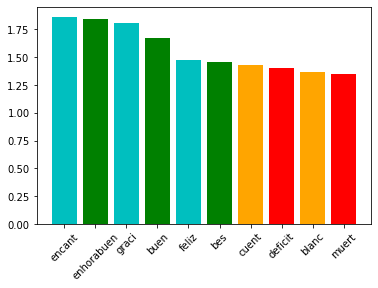

In [26]:
# create a dataset
y = scores_features_10['Score']
x = scores_features_10['Feature']
x_pos = np.arange(len(x))
colors = ['c', 'g', 'c', 'g', 'c', 'g','orange', 'r', 'orange','r']

# Create bars
plt.bar(x_pos, y,color=colors)

# Create names on the x-axis
plt.xticks(x_pos, x)
plt.xticks(rotation = 45)

# Show graph
plt.show()

---
---
---
c. ¿Cómo podrías mejorar el modelo?

In [27]:
# Clasificando los sentimientos en buenos, neutros y malos

In [28]:
# En vez de sustituir todos los emojis, se podrían clasificar también según su sentimiento

In [29]:
#  Teniendo en cuenta otros datos, no solo los textos, como el número de likes y retweets

In [30]:
# Modificando los parametros del modelo, para ver si son los mejores o no.
# Ej, max_features=1000, ngram_range=(1, 2)...

---
----
----
d. ¿Qué otras oportunidades se te ocurren donde se podrían aplicar otros
modelos de ML?

In [31]:
# En relación con el modelo ya creado:

# Se podrían crear modelos para ver si las campañas de marketing están teniendo un impacto en las redes sociales y ver así
# cuáles son más efectivas.

# Un modelo para ver cómo afectan las redes sociales al número de nuevos alumnos.

#  No relacionados
# Segmentar los posibles clientes dentro de la web a través de su comportamiento.

----
----
----
PRUEBAS

In [32]:
# PRUEBA MODELO

# # texto1 = 'Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI	'
# # texto1 = 'Muy deficitario. Estoy muerto. Lo odio 🤩'
# texto1 = 'Me encanta. 🤩 Ha sido muy bueno. Ojalá pueda repetir'
# # -----
# texto1_df = pd.DataFrame(columns=['tweet'])
# texto1_df = texto1_df.append({'tweet': texto1}, ignore_index=True)
# # texto1_df
# texto1_df['tweet'] = texto1_df['tweet'].apply(signs_tweets)
# # texto1_df.head(1)
# texto1_df['tweet'] = texto1_df['tweet'].apply(remove_links)
# # texto1_df.head(1)
# texto1_df['tweet'] = texto1_df['tweet'].apply(remove_stopwords)
# # texto1_df.head(1)
# texto1_df['tweet'] = texto1_df['tweet'].apply(spanish_stemmer)
# # texto1_df.head(1)
# texto1_df=texto1_df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
# # texto1_df.head(1)
# prediction1 = model.predict(texto1_df['tweet'])
# prediction1

-----